<img align="left" src="images/GMIT-logo.png" alt="GMIT" width="220"/>                                                      <img align="right" src="images/data-analytics.png" alt="HDipDA" width="250"/>  

# <center>Programming for Data Analysis 2019 Assignment: numpy.random</center>  #

***
**Module Name**: Programming for Data Analysis  
**Module Number**: 52465  
**Student Name**: Yvonne Brady  
**Student ID**: G00376355  
***

**Problem statement**
The following assignment concerns the numpy.random package in Python. You are
required to create a Jupyter notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

***

# Table of Contents #
1. [Introduction](#intro)  
2. [Purpose of NumPy](#numpy)  
3. [Purpose of numpy.random](#numpy.random)  
4. [Simple Random Data](#rand-data)  
5. [Permutations](#permutations)  
6. [Distributions](#dist)  
6.1 [Binomial Distribution](#binomial)  
6.2 [Normal or Gaussian Distribution](#normal)  
6.3 [Uniform Distribution](#uniform)  
6.4 [Chi-Squared Distribution](#chi)  
6.5 [Poisson Distribution](#poisson)  
6.6 [Distribution Comparison Summary](#summary)
7. [Seeds in Pseudorandom Number Generation](#seeds) 
8. [References](#refs)

 ## <a name="intro"></a>1. Introduction ## 
This assignment is completed in part fulfillment of the Programming for Data Analysis module of the Higher Diploma in Data Analytics awarded in GMIT. The goal of this assignment is to explain in lay terms the importance and use of the Python package NumPy, with particular focus on numpy.random.

## <a name="numpy"></a>2. Purpose of NumPy ##
Numpy is one of the core packages used in data analytics on the Python platform. It comprises a series of functions and methods that allow for easier data storage, retrieval and manipulation. It is centered on arrays, which are in essence what each dataset is made up of.  

NumPy has been around since 2005, when Travis Oliphant managed to merge the previously two competing numerical packages in Python, Numeric and NumArray,  into one package, NumPy. It is a contraction of the phrase Numerical Python and is the basis of most if not all Python packages with scientific functionality.  
  
Some of the main parts of NumPy include:  
* ndarray - a multidimensional array  
* functions - that perform mathematical operations quickly and efficiently. 

NumPy library of algorithms is written in the C language, a compiled rather than interpreted language which allows faster processing times. Its operations make it possible to perform complex calculations on entire arrays without the need for looping through each element in Python. NumPy algorithms are generally at least 10 to 100 times faster than their Python scripted alternatives.

NumPy is an external package that must be imported into python for use. Convention has it that it is imported as "np". Each numpy function etc can then be called by prefacing it with np.

In [1]:
%matplotlib inline
import numpy as np # Importing the NumPy library
import matplotlib.pyplot as plt # Importing matplotlib for plotting
from termcolor import colored # Just to display coloured text
from tabulate import tabulate # To create Python tables
plt.style.use('ggplot') # Setting a plot style
import scipy.stats as ss

## <a name="numpy.random"></a>3. Purpose of numpy.random ##

<img align="right" src="images/dice.jpg" alt="dice" width="200"/> 
Computers have long been used for complex mathematical calculations due to the speed and accuracy in which they follow instructions written in programs. They are so good at performing these tasks that many would be surprised at how apparently simple task of picking a random number is in reality a very difficult thing for the computer to do. Something a dice can do is beyond the abilities of even the most high-tech computer without very specific and complex code. In Python, this can be achieved in the form of the random sampling part of the numpy package - numpy.random.   

Whenever you need random data, be it random numbers, random sample of data, random placement of known values in an array, numpy.random provides all this functionality and more. The great difficulty in generating anything random is that computer likes to be told what to do simply saying "pick a random number" generally is too non-specific for a computer to process. As a result many "random" numbers generated by a computer are not fully random, but only pseudorandom, using a Pseudorandom Number Generator (PRNG). Number generated by a PRNG have an appearance of randomness, but in reality are deterministic, based on a repeatable algorithm. There are also True Random Number Generators (TRNG), which are much more complex but this is not the case for numpy.random.  

Being pseudorandom, PRNG numbers would not be suitable for applications such as cryptography or any gambling type purposes, but they are perfectly suited for simulation and data modelling. See [Table 1](#table1) below for the differences between TRNG and PRNGs.  

| <a name="table1"></a>Characteristic                    | Pseudorandom Number Generators    |True Random Number Generators      |
|----------------------------------	|----------------------------------	|----------------------------------	|
| Efficiency                    	| Excellent                        	| Poor                          	|
| Determinism                    	| Deterministic                    	| Nondeterministic                 	|
| Periodicity                    	| Periodic                       	| Aperiodic                     	|

**<center>Table 1 : TRNG vs PRNG</center>**

Random numbers are often used to generate random series of numbers, for testing programs in various scenarios, for random sampling of datasets, for many games, gambling, for determination of probabilities of risks etc. One such sample is given  in the simple game below:

*** 
**Simple Guessing Game**

In [2]:
# Simple Guessing Game
# Generate a random integer between 1 and 10
compChoice = np.random.randint(1,11)
# Ask the player to pick a number
yourChoice = int(input("Pick a number between 1 and 10: "))

Pick a number between 1 and 10: 3


In [3]:
# Compare the 
if compChoice == yourChoice:
    # If the player guessed right, tell them
    print(colored("Congrats - you guessed", "blue"), colored(yourChoice,'green'), colored("and I picked", "blue"), colored(compChoice, "green"))
else:
    # If the player guessed incorrectly, tell them too
    print(colored("Hard luck. You guessed","blue"), colored(yourChoice, "red"), colored("and I picked", "blue"), colored(compChoice, "green"))

Hard luck. You guessed 3 and I picked 1


## <a name="rand-data"></a>4. Simple Random Data##

There are a number of functions available to generate simple random data as shown in [Table 2](#table2) below. They all employ random functionality to produce random arrays and numbers of different data types from different probability distributions. We will have a look at each of these in turn.

| <a name="table2"></a>Function                             | Returns random ...                                       | Used                                                                                       |
|--------------------------------------|----------------------------------------------------------|--------------------------------------------------------------------------------------------|
| rand                                 | values between 0 and 1 from the uniform distribution.    | Where any of the numbers are equally likely.                                               |
| randn                                | values from the normal distribution with a mean of 0.    | To simulate real world data, generate "noise".                                             |
| randint                              | integers between specified limits (high value exclusive) | To generate random integers.                                                               |
| random_integers                      | integers of type np.int between specified limits.        | This function is deprecated so should not be used. Use random_integers instead. |
| random_sample; random;  ranf; sample | floats in the half-open interval [0.0, 1.0).             | As randn above.                                                                            |
| choice                               | sample from a given 1-D array                            | When you want to get random sample(s) from an existing array.                              |
| bytes                                | bytes                                                    | When you want random byte data.                                                                |

**<center>Table 2: Simple Random Data</center>**

**rand**  
_Syntax_ :  
np.random.rand(a, b, ....z)  
  
_Returns_ :  
Rand returns a randomly generated array of size specified in the the brackets, for example if only one number was specified it would return that many numbers in a list. All the numbers returned are between 0 and 1.  
The numbers returned are randomly selected with a [uniform distribution](#uniform), see below about distribution. This is useful where you want any random numbers within the range without bias. 
  
_Example_ :

Here x is a randomly generated list of 3000 numbers ranging from 0.000270133302640585 to 0.9999777511423924


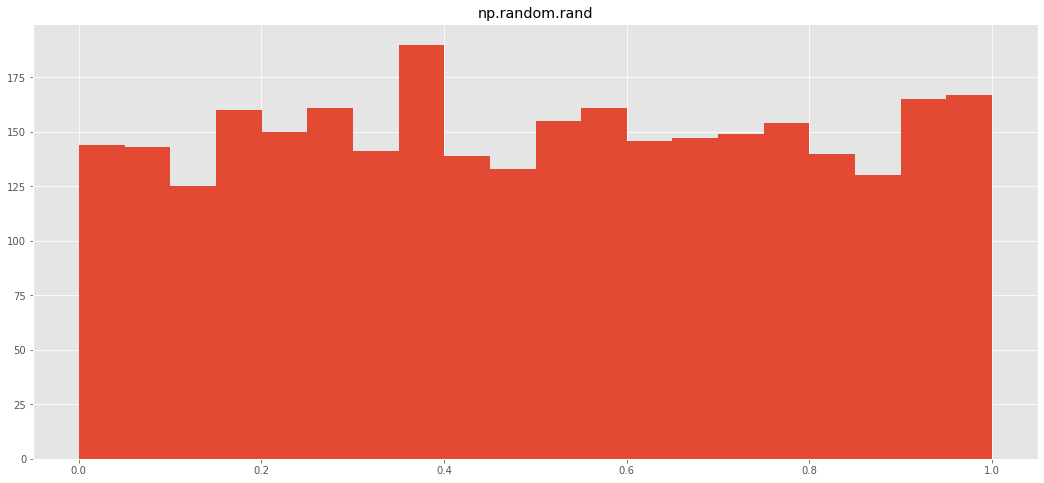

In [4]:
# Here we are using np.random.rand based on your choice of number from game above
x = np.random.rand(yourChoice*1000)
plt.rcParams['figure.figsize'] = [18, 8] # Setting the plot size
plt.hist(x, 20)
plt.title("np.random.rand")
print("Here x is a randomly generated list of", yourChoice * 1000, "numbers ranging from", min(x), "to" , max(x))

In [5]:
# Here we are using np.random.rand based on an array of size chosen from the game above.
x = np.random.rand(yourChoice, compChoice)
print("Here x is a randomly generated list of", yourChoice, "x", compChoice, "numbers")
x

Here x is a randomly generated list of 3 x 1 numbers


array([[0.63961379],
       [0.17439775],
       [0.71333628]])

While we have shown above that the random functions can generate arrays of data, for the rest of this notebook we will only look at single dimensional arrays.

**randn**  
_Syntax_ :  
np.random.randn(a, b, ....z)  
  
_Returns_ :  
randn returns a randomly generated array of size specified in the the brackets, just like the rand function. Unlike the rand function, the values returned centered on 0 with the majority falling between -1 and 1. The is due to the difference between rand and randn - distribution of the random figures returned.  
  
With the rand function, values are returned with a uniform distribution. This means that all numbers between 0 and 1 are equally likely to be returned. With the randn function, the returned figures follow a normalised distribution. This means that the values around the 0.5 are the most likely and increasingly less likely the further from the midpoint the value is. This is often used to simulate "noise" in a dataset created to mimic real world data.

_Example_ :

Here xn is a randomly generated list of 3000 numbers ranging from -3.178589369228121 to 4.2938869764016525


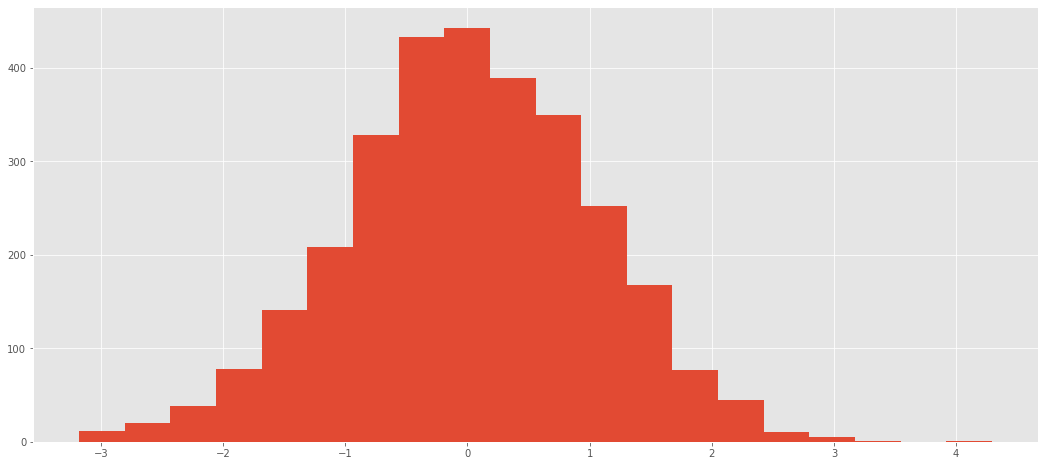

In [6]:
# Here we are using np.random.randn based on your choice of number above
xr = np.random.rand(yourChoice*1000)
xn = np.random.randn(yourChoice*1000)
plt.hist(xn, 20)
print("Here xn is a randomly generated list of", yourChoice * 1000, "numbers ranging from", min(xn), "to" , max(xn))

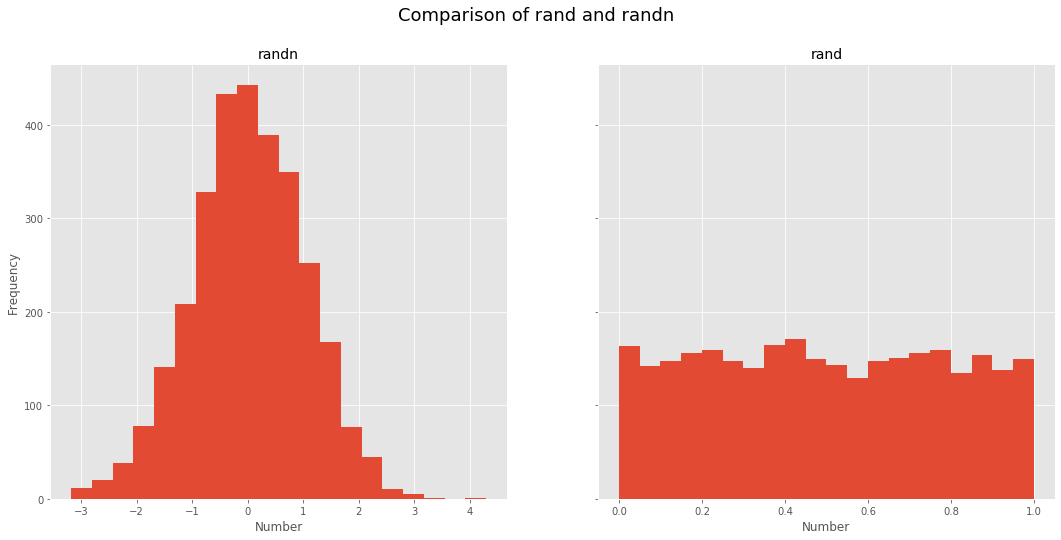

In [7]:
# Lets compare the two figures
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(xn,20)
ax2.hist(xr,20)

# Set labels
ax1.set_xlabel("Number")
ax2.set_xlabel("Number")
ax1.set_ylabel("Frequency")
fig.suptitle('Comparison of rand and randn', fontsize=18)
ax1.set_title('randn',fontsize=14)
ax2.set_title('rand',fontsize=14)
plt.show()

**randint**  
_Syntax_ :  
np.random.randint(low[, high, size, dtype])  
  
_Description_ :  
Randint returns randomly generated integers. You can specify the range limit of the values returned via the low and high variables. The value returned will include the "low" value, but will be up to but not including the "high" range value. This means that if you are looking for a number between 1 and 10 you need to specify that the low is 1 and the high is 11. If no high value is specified, the low value entered in fact acts as the high value and the low value is defaulted to 0. Interestingly enough, although the output is an or multiple integers, the low and high limits may be entered as floating point numbers.  
  
You may also specify the shape of the integers returned. This may be a single value, a list of numbers or multidimensional arrays via the size variable. This is not a mandatory field and if not specified, it is defaulted to a single number being returned.  

Finally you may also specify the datatype of the integer returned. Numpy has a variety of integer datatypes, depending on the maximum value required. int8 for example is one byte in length and is capable of holding numbers in the range -128 to 127. int16 for integers -32768 to 32767 and so on for int32, int64 and unsigned integers too. Although the documentation states that the default value if not specified is int, the tests below show that it is in fact int32.  

The numbers returned are randomly selected with a [uniform distribution](#uniform), see below about distributon.

randint was the function used to play the initial guessing game above.
  
_Returns_ :	
a "size-shaped" array of random integers from the appropriate distribution, or a single such random int if size not provided.  

_Example_ :

In [8]:
# Here we are looking for a number between 1 and 100 inclusive (as we have chosen 101 as the high value)
# The shape of the output will be an array of 5 integers, 
# and they will be of type int8's.
x = np.random.randint(1, 101, 5, np.int8)
print(x)
print("Each of type:", type(x[1]))

[52 18 43 40 68]
Each of type: <class 'numpy.int8'>


In [9]:
# Using floats as limits, size is defaulted to a single integer value returned.
np.random.randint(3.2, 14.3)

9

In [10]:
# Here we are setting just one value of 1. 
# As there is not both a lower and an upper limit set, 
# numpy assumes the value entered is the upper limit and 0 is taken as the lower limit.
# As the range does not include the upper limit in its output, the expect return is all 0's inthe case below.
# You can make the size as large as you want, but max will not exceed 0.
# The default type is also shown here too - as int32.

# To show the default is taken to be the upper limit which is never reached:
x = np.random.randint(1, size = 1000000000)
print(f"The minimum is {x.min()}. The maximum is {x.max(0)}.")
print("When not specified, the output is of type:", type(x[1]))

The minimum is 0. The maximum is 0.
When not specified, the output is of type: <class 'numpy.int32'>


In [11]:
# While the default type is int32 - here we are checking if that is automatically adusted to 
# take into account the range requested.
# Here we are looking for a number between -9223372036854775800 and -1 inclusive. 
# The shape of the output will be an array of 2x4 array integers rather than a one dimensionsal array, 
# and they will be of type int64's.
x = np.random.randint(-9223372036854775800 , 0, 10, np.int64)
print(x)
print("The output is of type:", type(x[1]))

[-8660527316322654751 -5645260147856471055 -9020529905637001920
  -925770506821121372 -4666443912517178161 -7068729806495372766
 -1829948861277146570 -6610044350266330350 -6627617296101759030
 -8786674563806407944]
The output is of type: <class 'numpy.int64'>


In [12]:
# --------- Expected Error --------
# Let's try that again, this time without specifying the dtype:
x = np.random.randint(-9223372036854775800 , 0, 10)
print(x)
print("The output is of type:", type(x[1]))
# --------- Expected Error --------

ValueError: low is out of bounds for int32

The error thrown above shows that the size of the datatype is not dependent on the range requested and defaults to int32. This function therefore throws an error if the range exceeds the limits of the int32 datatype (-2147483648 to 2147483647).  

Errors are also thrown in the high limit is lower than the low limit. This is true even when no high limit is specified if a negative number is inputted as the low variable.

In [13]:
# --------- Expected Error --------
# Here we are specifying a "low" of -5. 
# Due to the way in which the function handles the defaults however, 
# it assumes the entered value is the high value and defaults the low to 0.
# That means in this instance the low is higher than the high and will throw an error.
x = np.random.randint(-5)
print(x)
# --------- Expected Error --------

ValueError: low >= high

In [14]:
# As above but this time where the size is set to zero. 
# No error is thrown, but neither are numbers returned.
x = np.random.randint(-5, size = 0)
print(x)

[]


(array([1958., 1968., 2045., 1999., 1970., 2013., 2058., 1959., 2036.,
        1977., 2055., 1945., 2024., 2029., 1970., 1995., 2024., 2051.,
        1968., 2000., 2073., 1975., 2000., 2051., 2042., 2057., 1994.,
        2003., 1971., 2034., 2066., 1987., 1932., 1959., 2009., 2005.,
        1974., 2017., 1998., 2006., 1937., 1929., 1974., 1984., 1947.,
        2068., 1930., 2042., 1996., 1996.]),
 array([ 0.  ,  1.98,  3.96,  5.94,  7.92,  9.9 , 11.88, 13.86, 15.84,
        17.82, 19.8 , 21.78, 23.76, 25.74, 27.72, 29.7 , 31.68, 33.66,
        35.64, 37.62, 39.6 , 41.58, 43.56, 45.54, 47.52, 49.5 , 51.48,
        53.46, 55.44, 57.42, 59.4 , 61.38, 63.36, 65.34, 67.32, 69.3 ,
        71.28, 73.26, 75.24, 77.22, 79.2 , 81.18, 83.16, 85.14, 87.12,
        89.1 , 91.08, 93.06, 95.04, 97.02, 99.  ]),
 <a list of 50 Patch objects>)

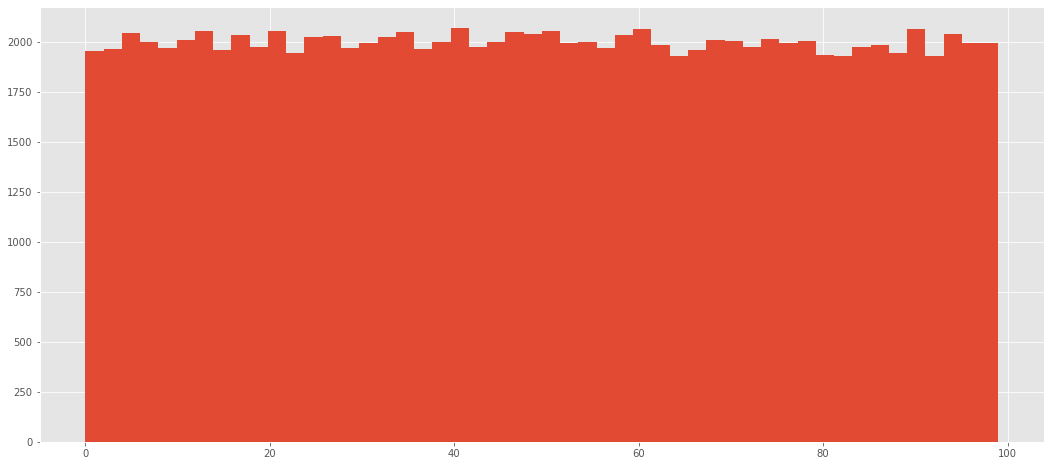

In [15]:
# Randint distribution - uniform
x = np.random.randint(100, size = 100000)
plt.hist(x,bins = 50)

**random_integers**  

_Syntax_ :
random_integers(low[, high, size])	


**Note:**  
The random_integers function is now deprecated. That means that this function is not recommended for use and will be withdrawn in the future. If you choose to use random_integers, your code may cease working in the future. Using the function now will result in a warning message being displayed. The randint function described above should be used instead to generate random integers. 

_Description_ :  
This is an older and now deprecated function that has been replaced by randint. As such it is very similar to the randint function. The two main differences between the two functions are:
* When specifying the limits with random_integers, the range INCLUDES both the high and low limits.
* An int32 is always returned - you cannot specify it to be any other sort of int.

_Examples_ :
The results from the above test for randint would be the same for random_integers with the exception of the test where you specify the integer type to anything other than int32. 

**random_sample** / **random** / **ranf** / **sample**  
_Syntax_ : random_sample([size]) / random([size]) / ranf([size]) / sample([size])   

_Description_  
random_sample may be called in numpy using a number of different aliases - 
* random_sample
* random
* ranf
* sample

All of the above actually call the same random_sample. This was evident under a previous version I started this project with as shown in a [screenshot](#screenshot) below. This is not so clear on the current version (1.17.2).  
<a name="screenshot"></a>![](images/numpy-version.png)  
**<center><a name="screenshot"></a>Screenshot from earlier version of NumPy</center>**

In [16]:
# From upgraded NumPy
print("Numpy Version No:", np.version.version)
print("np.random.random_sample :",np.random.random_sample)
print("np.random.random :",np.random.random)
print("np.random.randf :",np.random.ranf)
print("np.random.sample :",np.random.sample)

Numpy Version No: 1.17.2
np.random.random_sample : <built-in method random_sample of numpy.random.mtrand.RandomState object at 0x000001E7AF7BBCA8>
np.random.random : <built-in method random of numpy.random.mtrand.RandomState object at 0x000001E7AF7BBCA8>
np.random.randf : <built-in function ranf>
np.random.sample : <built-in function sample>


Like rand, random_sample returns random floating point number in the range 0.0 up to but not including 1.0. The only difference between the two functions is the way you input the size of the array requested. In the rand function it is assumed that an array is requested and you simply enter the size of each dimension of the array - a single number being one dimensional etc. For the random_sample if an array is wanted it must be surrounded by additional brackets.

Similarly the random_sample randomly takes values from the normal distribution.

Returns:	
out : float or ndarray of floats
Array of random floats of shape size (unless size=None, in which case a single float is returned).

In [17]:
print("random_sample:", np.random.random_sample(5))
print("rand:",np.random.rand(5))

random_sample: [0.05704858 0.81038552 0.64413443 0.68607203 0.7367402 ]
rand: [0.94588326 0.93289967 0.41899055 0.0539124  0.48165118]


In [18]:
print("random_sample:", np.random.random_sample((2,3)))
print("rand:",np.random.rand(2,3))

random_sample: [[5.79496563e-02 5.67805888e-02 9.49693905e-01]
 [3.44574546e-02 8.36212889e-01 8.76829044e-04]]
rand: [[0.57999851 0.63773773 0.28276096]
 [0.90342617 0.80410835 0.00396187]]


**choice**  
_Syntax:_
choice(a[, size, replace, p])  

_Description:_  
Generates a random sample from a given 1-D array. Essentially this mean that it is the numpy equivalent of "Pick a card, any card."  

It requires a single parameter and this the list / tuple / array the selection must come from. It is possible to only put a single value in and in that scenario python will assume it to mean values from the range from 0 up to but not including a.  
There are also three additional parameters you can specify, but these are optional. The first is the size of the return values. This is the number and shape of values you want returned. The default value is 1, where a single value is returned.

You can also specify whether to replace a value after sampling too. By replacing we mean if for example you had a list containing numbers from 1 -10 and you asked to sample 5 numbers from that list. If you were to replace the number (replace parameter = true) then any number can come out every sampling opportunity, in this example up to five times. If the replace value is set to false however, once a value is chosen from the list it is not then returned to the list for the next sample. That means that you will always get five different numbers in the returned values. If not specified it is assumed that the values are to be replaced with the default replace setting being true.  

Finally you may also specify the probabilities of each element in the selection list. If not specified, it is assumed a uniform distribution is used where (replacement aside) each number is equally likely to be chosen at each sample. If a specific probability is required, this must be entered in a list of the same length as the original list. The higher the value, the greater the chance of selecting the item in that list. The sum of all probabilities entered must equal 1.

_Returns:_  
The generated random samples of the specified shape with the given probability.

Raises:	
ValueError
If a is an int and less than zero, if a or p are not 1-dimensional, if a is an array-like of size 0, if p is not a vector of probabilities, if a and p have different lengths, or if replace=False and the sample size is greater than the population size

In [19]:
# a as numbers
a = [164,25,873,45,99,45,6452]
print("a =",a)
print("Random choice from a =",np.random.choice(a))
print("Another random choice from a (of size 2) =",np.random.choice(a,2))
print("Another random choice from a (of size 2*2) =",np.random.choice(a,(2,2)))

a = [164, 25, 873, 45, 99, 45, 6452]
Random choice from a = 164
Another random choice from a (of size 2) = [6452  164]
Another random choice from a (of size 2*2) = [[ 99  45]
 [873 873]]


In [20]:
# a as a single number
a = 10
print("a =", a)
print("Random choice from a =",np.random.choice(a))
print("Another random choice from a (of size 5) =",np.random.choice(a, 5))

a = 10
Random choice from a = 6
Another random choice from a (of size 5) = [6 9 4 9 4]


In [21]:
# a as strings
a = ["Monday", "Tuesday", "September", "April", "bananas"]
print("a =",a)
print("Random choice from a =",np.random.choice(a))
print("Another random choice from a (of size 3) =",np.random.choice(a, 3))

a = ['Monday', 'Tuesday', 'September', 'April', 'bananas']
Random choice from a = Monday
Another random choice from a (of size 3) = ['Tuesday' 'April' 'April']


In [22]:
# Skewing the results using weighted probabilities
a = 10
print("a =", a)
print("Random choice from a (of size 10, with uniform probability) =",np.random.choice(a, 10))
print("Another random choice from a (of size 10 with weighted probabilities) =",np.random.choice(a, 10, p =[0, 0, 0.1,0,0.1, 0, 0.8, 0, 0,0]))

a = 10
Random choice from a (of size 10, with uniform probability) = [3 9 1 4 8 9 0 3 7 0]
Another random choice from a (of size 10 with weighted probabilities) = [6 6 2 4 6 6 4 6 6 6]


**random.bytes**  
_Syntax:_  
np.random.bytes(length)  

_Description_  
random.bytes as the name would suggest returns a randomly generated series of bytes of the defined length. Randomly generated bytes may be used in cryptography, but not the numpy generated version as it is not cryptographically secure. See [below](#seeds).  

It takes a single parameter, an integer that defines the number of bytes returned.  
 
_Returns:_  
random.bytes returns the number of bytes as requested. This is actually a series of bytes but is represented in a string like manner prefaced with a "b".

In [23]:
x = np.random.bytes(1)
print("Returns:",x)
print("Type of x =",type(x))

Returns: b'\xe0'
Type of x = <class 'bytes'>


In [24]:
for i in range (1,11):
    x = np.random.bytes(i)
    print("Length =",i ,"Result =", x, "String length =", len(x))

Length = 1 Result = b'\xe3' String length = 1
Length = 2 Result = b'\xeep' String length = 2
Length = 3 Result = b'E\xe1`' String length = 3
Length = 4 Result = b'V\xf0|@' String length = 4
Length = 5 Result = b'B\x11F\x1b ' String length = 5
Length = 6 Result = b'\xf6=\t\x92\x18\xa4' String length = 6
Length = 7 Result = b'-_8\xc6\xde\x08k' String length = 7
Length = 8 Result = b'\x9a\x9cR\x1cQ\xd6[x' String length = 8
Length = 9 Result = b'P\xc7\xb7\x88\x1a\xcbe\x96\xad' String length = 9
Length = 10 Result = b'\xb3qEt\xf4\xc3\xd6\x08k{' String length = 10


(array([496., 488., 499., 499., 485., 519., 523., 500., 522., 531., 512.,
        464., 530., 469., 534., 483., 499., 508., 483., 471., 495., 477.,
        507., 491., 488., 500., 506., 535., 469., 506., 509., 488., 514.,
        475., 502., 475., 526., 501., 486., 470., 514., 490., 498., 504.,
        495., 460., 477., 493., 497., 531., 451., 489., 528., 497., 495.,
        514., 540., 502., 547., 511., 472., 493., 507., 467., 509., 497.,
        501., 526., 483., 508., 496., 492., 504., 561., 523., 487., 533.,
        479., 542., 511., 495., 504., 509., 531., 502., 495., 494., 493.,
        508., 500., 484., 542., 506., 467., 502., 473., 497., 464., 450.,
        525.]),
 array([  0.  ,   9.99,  19.98,  29.97,  39.96,  49.95,  59.94,  69.93,
         79.92,  89.91,  99.9 , 109.89, 119.88, 129.87, 139.86, 149.85,
        159.84, 169.83, 179.82, 189.81, 199.8 , 209.79, 219.78, 229.77,
        239.76, 249.75, 259.74, 269.73, 279.72, 289.71, 299.7 , 309.69,
        319.68, 329.67, 339.66

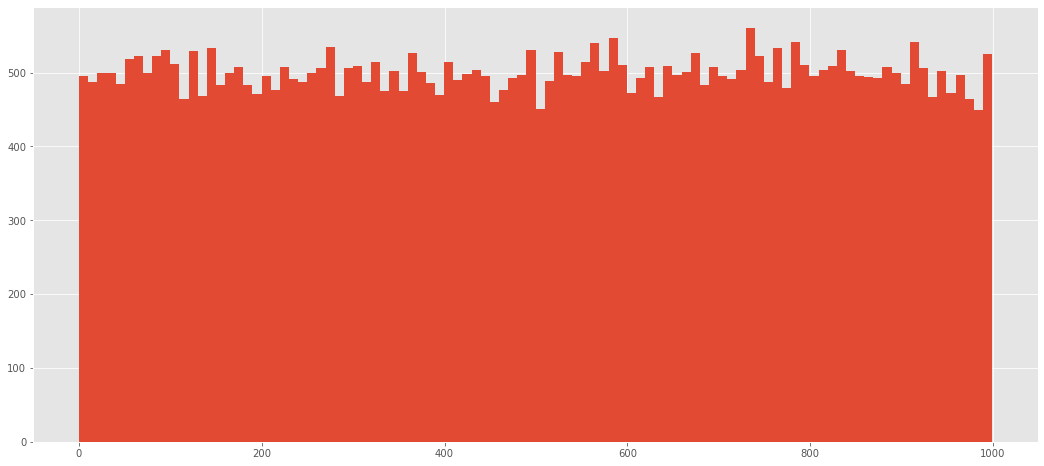

In [25]:
# When converted to int values - the random.bytes generate byte data in the uniform distribution
uint16_max = np.iinfo(np.uint16).max 
k=np.frombuffer(np.random.bytes(100000),dtype=np.uint16) 
x = np.uint16((1000)*(k/float(uint16_max)))
plt.hist(x,100)

## <a name="permutations"></a>5. Permutations ##

A permutation is an arrangement of elements in a list, set, tuple or array. For example the list 1, 2, 3 could appear like this:  
Permutation 1: 1, 2, 3.  
Permutation 2: 1, 3, 2.  
Permutation 3: 2, 1, 3.  
Permutation 4: 2, 3, 1.  
Permutation 5: 3, 1, 2.  
Permutation 6: 3, 2, 1.  

In fact the number of permutations is governed by the length of the list and is calculated by the designation n factorial represented as n! where n is the list length. This is simply a shorthand way of writing:  
$n! = n * (n-1) * (n-2) * ... * 3 * 2 * 1$

In the case of the list 1, 2, 3 above this translates to $3 * 2 * 1 = 6$ possible permutations of that list.  

The concept of permutation is very important in data analytics as when applying any kind of machine learning techniques to a dataset, the original dataset is divided into training and testing datasets to fit the desired model. This division of the dataset must be done in a random manner as opposed to for example taking the first x number of rows as the data may have been entered in a specific ordered manner. Each dataset (training and testing) should be representative of the dataset in its entirety to ensure an accurate model generation and validation of that model thereafter.  

There are two kinds of permutations available with numpy as shown in the table below. 


| Name           | Description                                              |
|----------------|----------------------------------------------------------|
| shuffle(x)     | Modify a sequence in-place by shuffling its contents.    |
| permutation(x) | Randomly permute a sequence, or return a permuted range. |  

**<center>Table 3 - Permutations Available in Numpy Random<center>**

Both permutation methods work in the same way - by randomly rearranging the elements in the list. The main difference between the two is the fact that the shuffle method re-arranges the elements within the input array itself. This means that the array is then forever changed. The function shuffle itself does not return anything.  

The permutation returns the rearranged array / list as a new array / list and the original array / list remains untouched. This is a very important distinction between the two. As shown below:

In [26]:
# Difference between permutation and shuffle
x = np.arange(10)
print("This is the original list:",x)
print("This is performing a permutation on the list:",np.random.permutation(x))
print("This is the list after performing the permutation:",x)
print("This is performing a shuffle:",np.random.shuffle(x))
print("This is the list after performing a shuffle:",x)

This is the original list: [0 1 2 3 4 5 6 7 8 9]
This is performing a permutation on the list: [7 5 4 6 8 2 0 9 3 1]
This is the list after performing the permutation: [0 1 2 3 4 5 6 7 8 9]
This is performing a shuffle: None
This is the list after performing a shuffle: [2 3 0 8 1 4 9 5 6 7]


Both functions may take in multi-dimensional arrays. In both cases the function only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.

In [27]:
# Handling of 2-dimenstional arrays
x = np.arange(25).reshape(5,5)
print ("This is the original x:\n",x, "\n")
print ("This is after permuation:\n", np.random.permutation(x), "\n")
print ("This is the original x:\n",x, "\n")
np.random.shuffle(x)
print ("This is after shuffle:\n", x, "\n")


This is the original x:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

This is after permuation:
 [[20 21 22 23 24]
 [15 16 17 18 19]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [ 0  1  2  3  4]] 

This is the original x:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 

This is after shuffle:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [15 16 17 18 19]] 



In [28]:
# Handling of 3-dimenstional arrays
x = np.arange(27).reshape(3,3,3)
print ("This is the original x:\n",x, "\n")
print ("This is after permuation:\n", np.random.permutation(x), "\n")
print ("This is the original x:\n",x, "\n")
np.random.shuffle(x)
print ("This is after shuffle:\n", x, "\n")


This is the original x:
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]] 

This is after permuation:
 [[[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]] 

This is the original x:
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]] 

This is after shuffle:
 [[[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]] 



## <a name="dist"></a>6. Distributions ##

When we examine a dataset it is important to realise that no matter how big that dataset is, it is only a sample of the full data. For example in the datasets we have worked with to date:  
* Iris Dataset is only 150 samples of three different types of Iris. 
* Tips dataset is only data taken from one waiter in one restaurant over a defined time period. 
* Met Eireann weather data is for that place in that time period given. 

The power of the dataset is what decisional information we can mine from them. This generally is in the form of predicting, if this has happened in the past, what will happen in the future? To do this we try to find the original probability distribution from which the collected data originated to have a degree of confidence in our predictions.  

Essentially a probability distribution is the probability of a conclusion being correct. Every time we interpret data, we need to know the chance we make a mistake when claiming a conclusion, as although drawing a conclusion is easy, drawing a <u>reliable</u> conclusion is hard. Knowing the distribution we can make calculations based on this information - for example we can calculate the expiration date of a carton of milk as the day before about 99.99% of all milk is still good. That way we would only have to deal with about 1 in 10,000 products gone bad.

There are many distribution patterns noted for example if we rolled a single die - every time we rolled it any of the numbers from 1-6 are equally likely. This kind of distribution is called a [uniform distribution](#uniform) (see below). Conversely, if we measured 1000 people's blood pressure we are likely to have a bell curved shaped plot with most people having a blood pressure around 120/80. The further you go away from this average the less likely this is to occur. This distribution is a [normal distribution](#normal), see below.  

The type data itself can vary. It can be discrete for example voting patterns, there are a finite number of parties that are available to vote for, or in the example of the rolling of a die - there are only six possible outcomes with each roll. In contrast to the discrete data, data may be _continuous_ instead. This is where the data may be any value n a range, for example the heights of a population. or to put it another way, a continuous random variable can have any value between two specified values. A discrete random variable has only one value chosen from a list of exact values.

With the probability distribution model known, it is possible to perform a fit to see if the distribution model under consideration is in fact a good fit for any given data. You may also discover the probability of an exact value arising and the percentage of the probability density is to the left or right of any given value.

Knowing your data is key to knowing which distribution to use. 
* What kind of data would you expect?
* Would the data be expected to centre about a particular value for example?
* Are there defined values or is the data continuous in nature?
* Are the time / date values to take into consideration?


When you know the answers to these questions, you may chose a distribution model that best fits your needs. There are 35 different distributions available with numpy random. We shall discuss 5 distributions in particular:  

1. [Binomial Distribution](#binomial)  
2. [Normal Distribution](#normal)
3. [Uniform Distribution](#uniform)
4. [Chi Squared Distribution](#chi)  
5. [Poisson Distribution](#poisson)   

| Dsitribution Function                        | Description                                                                                                           |
|----------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| beta(a, b[, size])                           | Draw samples from a Beta distribution.                                                                                |
| binomial(n, p[, size])                       | Draw samples from a binomial distribution.                                                                            |
| chisquare(df[, size])                        | Draw samples from a chi-square distribution.                                                                          |
| dirichlet(alpha[, size])                     | Draw samples from the Dirichlet distribution.                                                                         |
| exponential([scale, size])                   | Draw samples from an exponential distribution.                                                                        |
| f(dfnum, dfden[, size])                      | Draw samples from an F distribution.                                                                                  |
| gamma(shape[, scale, size])                  | Draw samples from a Gamma distribution.                                                                               |
| geometric(p[, size])                         | Draw samples from the geometric distribution.                                                                         |
| gumbel([loc, scale, size])                   | Draw samples from a Gumbel distribution.                                                                              |
| hypergeometric(ngood, nbad, nsample[, size]) | Draw samples from a Hypergeometric distribution.                                                                      |
| laplace([loc, scale, size])                  | Draw samples from the Laplace or double exponential distribution with specified location (or mean) and scale (decay). |
| logistic([loc, scale, size])                 | Draw samples from a logistic distribution.                                                                            |
| lognormal([mean, sigma, size])               | Draw samples from a log-normal distribution.                                                                          |
| logseries(p[, size])                         | Draw samples from a logarithmic series distribution.                                                                  |
| multinomial(n, pvals[, size])                | Draw samples from a multinomial distribution.                                                                         |
| multivariate_normal(mean, cov[, size, ...)   | Draw random samples from a multivariate normal distribution.                                                          |
| negative_binomial(n, p[, size])              | Draw samples from a negative binomial distribution.                                                                   |
| noncentral_chisquare(df, nonc[, size])       | Draw samples from a noncentral chi-square distribution.                                                               |
| noncentral_f(dfnum, dfden, nonc[, size])     | Draw samples from the noncentral F distribution.                                                                      |
| normal([loc, scale, size])                   | Draw random samples from a normal (Gaussian) distribution.                                                            |
| pareto(a[, size])                            | Draw samples from a Pareto II or Lomax distribution with specified shape.                                             |
| poisson([lam, size])                         | Draw samples from a Poisson distribution.                                                                             |
| power(a[, size])                             | Draws samples in [0, 1] from a power distribution with positive exponent a - 1.                                       |
| rayleigh([scale, size])                      | Draw samples from a Rayleigh distribution.                                                                            |
| standard_cauchy([size])                      | Draw samples from a standard Cauchy distribution with mode = 0.                                                       |
| standard_exponential([size])                 | Draw samples from the standard exponential distribution.                                                              |
| standard_gamma(shape[, size])                | Draw samples from a standard Gamma distribution.                                                                      |
| standard_normal([size])                      | Draw samples from a standard Normal distribution (mean=0, stdev=1).                                                   |
| standard_t(df[, size])                       | Draw samples from a standard Student’s t distribution with df degrees of freedom.                                     |
| triangular(left, mode, right[, size])        | Draw samples from the triangular distribution over the interval [left, right].                                        |
| uniform([low, high, size])                   | Draw samples from a uniform distribution.                                                                             |
| vonmises(mu, kappa[, size])                  | Draw samples from a von Mises distribution.                                                                           |
| wald(mean, scale[, size])                    | Draw samples from a Wald, or inverse Gaussian, distribution.                                                          |
| weibull(a[, size])                           | Draw samples from a Weibull distribution.                                                                             |
| zipf(a[, size])                              | Draw samples from a Zipf distribution.                                                                                |  

**<center>Table 4 - Distributions Available in Numpy Random</center>**

### <a name="binomial"></a>6.1 Binomial Distribution ###  
A binomial experiment, as the "bi-" part of the name suggests concerns probabilities where there are only two possible results. Consider for example a toss of a coin, there are two possible outcomes - heads or tails. In this case (assuming the coin is not weighted), the two outcomes are equally likely. It could however be whether a candidate in an election of 5 candidates is voted in or not. Campaigning, policies, track-records etc aside, the probability of any one of the candidates being elected is 1 in 5 and not being elected in 4/5. The probability of selecting a named card from a full deck _e.g._ the Ace of Diamonds, is 0.019 (or 1 in 52), if getting any Ace is 0.77 (1 in 13), of getting any Diamond is 0.25 (1 in 4) or a red card is 0.5 (1 in 2). All of these scenarios are the results of binomial experiments. 

A Binomial Distribution is the cumulative probability of this outcome over repeated trials. It assumes the following:  
* There are two possible outcomes.
* The probability of success is constant throughout.
* All trials are independent _ie_ the toss of a coin in unaffected by the previous result of tossing the coin.

Take for example tossing a coin three times. These are the outcomes

    1. Heads - Heads - Heads = 3 Heads; 0 Tails  
    2. Heads - Heads - Tails = 2 Heads; 1 Tail  
    3. Heads - Tails - Heads = 2 Heads; 1 Tail  
    4. Heads - Tails - Tails = 1 Head;  2 Tails  
    5. Tails - Heads - Heads = 2 Heads; 1 Tail  
    6. Tails - Heads - Tails = 1 Head;  2 Tails  
    7. Tails - Tails - Heads = 1 Head;  2 Tails  
    8. Tails - Tails - Tails = 0 Head;  3 Tails  

Each of these outcomes is as likely as each other giving a probability of 1/8 for each. If the order did not matter however, we can see there are only four possible combinations:  
* 3 Heads & 0 Tails (1/8 chance)
* 2 Heads & 1 Tail (3/8 chance)
* 1 Head & 2 Tails (3/8 chance)
* 0 Heads & 3 Tails (1/8 chance)

If we plotted this out it would look like this:

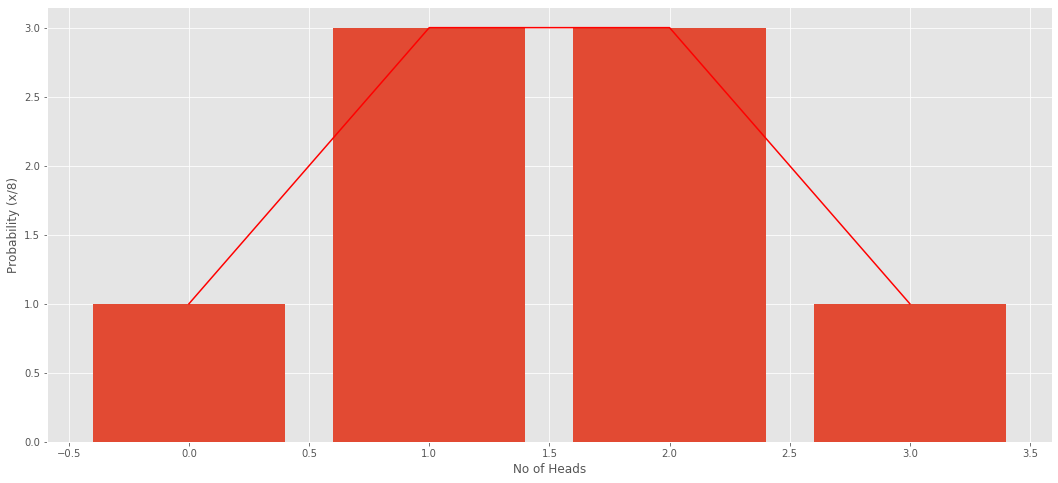

In [29]:
# PLotting the results
fig, ax = plt.subplots()
ax.bar(np.arange(4),[1,3,3,1])
ax.plot(np.arange(4),[1,3,3,1], "r-")
ax.set_xlabel("No of Heads")
ax.set_ylabel("Probability (x/8)")
plt.show()

As can be seen, this graph shows the distribution of probabilities is symmetrical. In fact is has been determined that any binomial probability outcome can be determined by the formula:  
$${N \choose x} = \frac{N!}{x!(N-x)!}$$

Where $N$ is the total number of possible combinations and $x$ is the number we want. This ${N \choose x}$ representation is called N choose x.  

So in the example above, N would be 3 for three coin flips. If we wanted to find out the probability of getting 2 heads in this scenario, the equation would be as follows:

$$ N = 3; x = 2$$  
$${3 \choose 2} = \frac{3!}{2!(3-2)!}$$  

$$= \frac{6}{2}$$  

$$= 3$$

This is as we had already worked out above 3 out of 8 possible outcomes.  

Sometimes however the result of any particular binomial experiment are not equally likely. For example in any given football match, draws excluded, there are two possible outcomes for each team - they either win or lose. Now supposing Team A is made up of the best football players that have ever existed and Team B is made up of whoever happened to be in the local bar at the time. In this scenario, while there are still two possible outcomes for Team A it is far more likely that they will win rather than lose. This is represented as a bias.  

Suppose we decided that Team A has a 90% chance of winning. What would the probability be of Team B winning a match if they played three times?

![](images/Binomial.png) 

We can see here that as before with three "experiments" there are three ways in which we can achieve the outcome of two positives and one negative result. The probability of any one of those outcomes however is  
$$ 0.9 * 0.9 * 0.1 = 0.081 $$  

This can be expressed in a formula as:  
Probability of a defined outcome over a number of experiments $$=  p^{x}(1-p)^{N-x}$$

Where $p$ is the probability of the outcome in question and $N$ is the total number of experiments. As the sum of all possible probabilities is always 1 the probability of the inverse outcome _ie_ Team A losing, is $(1 - p)$. Using this generic formula we get:  

$$p^{x}(1-p)^{N-x}= 0.9^{2}(1-0.9)^{3-2}$$

$$ = 0.9^{2}(0.1)^{1}$$

$$= 0.9 * 0.9 * 0.1$$

$$ = 0.081$$  

The same result as above. By putting the two formulae we have used together we can calculate how many outcomes and the probability of each. We can put these together to get P(x) the probability of x positive results out of N experiments:  

$$P(x) = \frac{N!}{x!(N-x)!} p^{x}(1-p)^{N-x}$$

$$ = \frac{3!}{2!(3-2)!} 0.9^{2}(1-0.9)^{3-2}$$

$$= \frac{6}/{2}(0.81)(0.1)$$

$$ = (3)(0.081)$$

$$ = 0.243$$

**Mean, Variance and Standard Deviation of Binomial Distributions**
The mean ($\mu$) of a binomial distribution of N number of experiments with a probability of a positive outcome of $p$ is:
$$\mu = Np$$

The variance ($\sigma ^{2}$) is:
$$\sigma ^{2} = N p (1-p)$$

And the standard deviation ($\sigma$) of:
$$ \sigma = \sqrt{N\pi(1-p)}$$

**Numpy Binomial Distribution**  
Numpy can generate an array of data based on the binomial distribution using the method numpy.random.binomial.  

_Syntax_  
numpy.random.binomial(n, p, size=None)

_Description_  
numpy.random.binomial draws samples from a binomial distribution taking input parameters of n, which refers to the number of trials to be run, and p, the probability of a positive outcome.  

There is also an additional parameter of size which is the output shape. What this essentially means is the number of times the test is to be repeated. The output will be the result of each of these tests. For example if not specified, the test will be performed once only. If a single number is specified the output will be a list of size length each representing the outcome of the n trials with p probability of success. An array may also be specified, again each figure outputted represents a single iteration of the trial.  

_Returns_  
Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.


In [30]:
# If a coin was tossed three times (n = 3)
# The head and the tail equally likely (p = 0.5)
# The this experiment run 2 x 10 times (size = (2,10))
np.random.binomial(3, 0.5, (2,10))

array([[0, 1, 2, 3, 1, 3, 3, 1, 3, 3],
       [2, 0, 2, 2, 2, 2, 1, 2, 2, 2]])

+---------------+---------------+-------------+---------------+-------------+
|   Probability |   𝜇(Expected) |   𝜇(Actual) |   𝜎(Expected) |   𝜎(Actual) |
+===============+===============+=============+===============+=============+
|           0.1 |           100 |     100.164 |       9.48683 |     9.13264 |
+---------------+---------------+-------------+---------------+-------------+
|           0.2 |           200 |     199.678 |      12.6491  |    13.2432  |
+---------------+---------------+-------------+---------------+-------------+
|           0.3 |           300 |     300.108 |      14.4914  |    14.1564  |
+---------------+---------------+-------------+---------------+-------------+
|           0.4 |           400 |     399.564 |      15.4919  |    15.5655  |
+---------------+---------------+-------------+---------------+-------------+
|           0.5 |           500 |     501.432 |      15.8114  |    15.379   |
+---------------+---------------+-------------+---------------+-

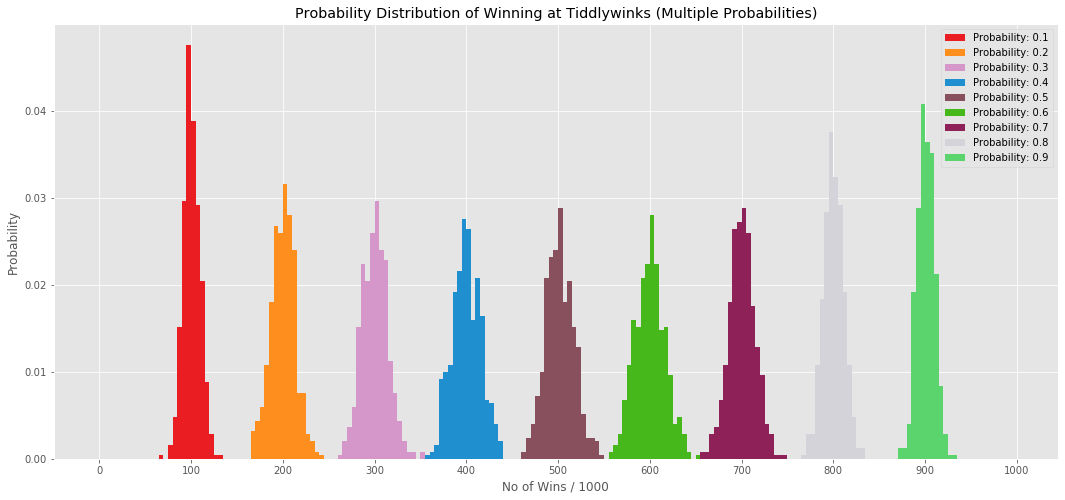

In [31]:
# Determine the probability of number of wins in tiddlywinks over the year (1000 games)

# n = no of games
n = 1000 

# number of time you want the test to be repeated
size = 500

# histogram bin width, for data visualization
binwidth = 5

# Needed to create a table
rows=[]

# Going to check against a range of probabilities from 0.1 - 0.9
for p in range(1, 10):
    # Probability
    prob = p / 10
    
    # generate size values from a binomial distribution
    bn_values = np.random.binomial(n, prob, size=size)
    
    # Add to the table
    rows.append([prob, n*prob, np.mean(bn_values), np.sqrt(n*prob*(1-prob)),np.std(bn_values)]) 
    
    # draw histogram of binomial values
    plt.hist(
        bn_values,
        bins=[x for x in range(0, n, binwidth)],
        density=1,
        # pick a random color - using np.random.rand!
        color = np.random.rand(1, 3),
        # label the histogram with its probability
        label="Probability: "+str(prob))

# Configuring Plot
plt.xticks(np.arange(0, 1100, 100))
plt.xlabel("No of Wins / 1000")  
plt.ylabel("Probability")  
plt.title("Probability Distribution of Winning at Tiddlywinks (Multiple Probabilities)")
plt.legend(loc="upper right")

# Create Table showing the difference between calculated and actual values of means and std deviations
hdr = ["Probability", "𝜇(Expected)","𝜇(Actual)", "𝜎(Expected)", "𝜎(Actual)"]
print(tabulate(rows, headers = hdr,  tablefmt="grid"))

plt.show()


We can see from above that the plot that the probability of the individual binomial experiment depends as you would expect on the probability of the individual experiment p. The calculated and the actual means and standard deviations tally well.

## <a name="normal"></a>6.2 Normal or Gaussian Distribution###

The most common distribution in real world situations is the Normal distribution. Examples of data that fit that distribution are many health statistics like height, birth weights, blood pressure, exam test results, investments etc. Unlike the binomial distribution, the normal distribution is continuous, meaning that all possible values are represented (as opposed to just 0 and 1 with nothing in between). It is said according to the Central Limits Theorem that all data approaches Normal distribution with a large enough sample size no matter what shape the original distribution was.  

The Normal distribution is characterised by the distinctive bell shaped curve and may be fully described using just the mean (μ) and the standard deviation (σ) values. To fit the Normal distribution model it has to have the following characteristics:  
* The mean, median and mode of the distribution coincide.
* The curve of the distribution is bell-shaped and symmetrical about the mean - half the values to the left of the centre and the other half to the right.  
* The curve never reaches 0.  

The smaller the standard deviation the sharper the peak of the bell. Being symmetrical, one of the properties of a normally distributed dataset is that no matter the actual values, there is a probability of 68.27% that any value will be within one standard deviation of the mean; 95.45% that it lies within 2σ of the mean and 99.73% that it lies between 3σ of the mean.     

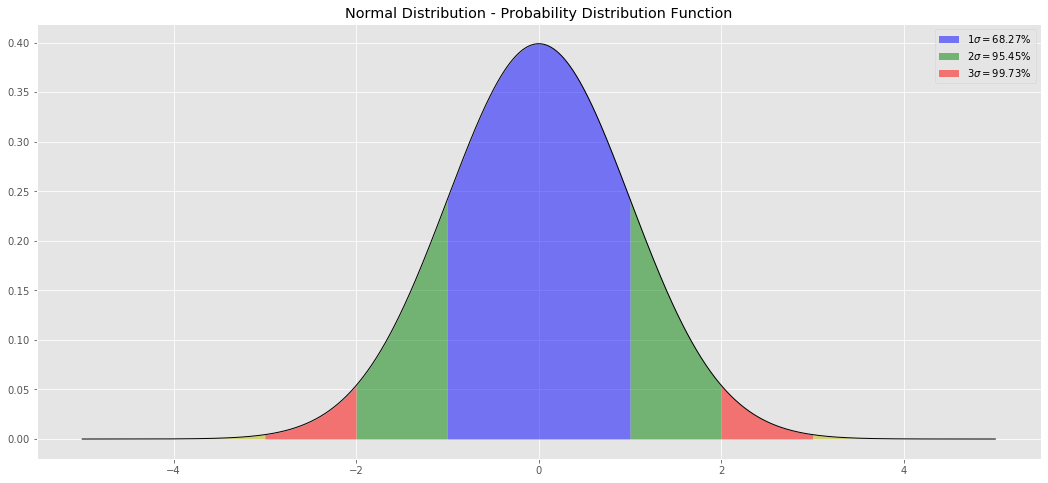

In [32]:
# Figure taken from notes on Statistical Bias showing the %s for the σ's
# Get evenly spaced data
x = np.linspace(-5.0, 5.0, 10000)

# Plot the outline of the plot in black
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

# Break the plot into segments and plot each one to show the % for each σ
# below -3 σ
xseg = x[np.logical_and(-5.0 <= x, x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)

# Between -2 and -3 σ
xseg = x[np.logical_and(-3.0 <= x, x <= -2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0)

# Between -1 and -2 σ
xseg = x[np.logical_and(-2.0 <= x, x <= -1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0)

# Between +1 and -1 σ
xseg = x[np.logical_and(-1.0 <= x, x <=  1.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='b', alpha=0.5, linewidth=0, label="$1 \sigma = 68.27\%$")

# Between 1 and 2 σ
xseg = x[np.logical_and( 1.0 <= x, x <=  2.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='g', alpha=0.5, linewidth=0, label="$2 \sigma = 95.45\%$")

# Between 2 and 3 σ
xseg = x[np.logical_and( 2.0 <= x, x <=  3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='r', alpha=0.5, linewidth=0, label="$3 \sigma = 99.73\%$")

# Over 3 σ
xseg = x[np.logical_and( 3.0 <= x, x <=  5.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)

plt.title("Normal Distribution - Probability Distribution Function")
plt.legend();

The Probability Density Function (PDF) of a random variable X following a normal distribution is given by:  

$$f(x) = \frac{1}{\sqrt(2)\pi\sigma}e^{\{-\frac{1}{2}(\frac{x - \mu}{\sigma})^{2}\}}\text{  for} -\infty < x < \infty$$

Meaning that the probability of a value lying between two given values $a$, and $b$ is:
$$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$$


numpy.random generates data with a normal distribution via the numpy.randn function as shown above, but where you want to specifically define the mean and standard deviation, you should use the numpy.random.normal function.

**numpy.random.normal**  
_Syntax_  
numpy.random.normal(loc=0.0, scale=1.0, size=None)

_Description_  
Draw random samples from a normal (Gaussian) distribution. All its associated intake parameters are optional. The ifrst parameter, loc is a float (or array of floats) which is equivalent to the mean of the distribution. If no value is added, it is assumed to the be standard normal distribution which is centred on the 0 value being the mean.   

The second parameter is called the scale, but is equivalent to the standard deviation value of the distribution. If no value is selected is is assumed to be the standard normal distribution where the standard deviation is 1.  

The final parameter is the size, which like all other distributions is the shape of the output. The default value for the shape is None which is equivalent to  a singel value being outputted.  

_Returns:_  
Drawn samples from the parameterized normal distribution.

In [33]:
# Just getting a single value where no parameters are specified.
np.random.normal()

-0.033757638410210025

+---------------+--------------+---------------+-------------+
|   𝜇 (entered) |   𝜇 (Actual) |   𝜇(Expected) |   𝜎(Actual) |
+===============+==============+===============+=============+
|             0 |    0.0021725 |             1 |    0.999086 |
+---------------+--------------+---------------+-------------+
|             5 |    5.02989   |             5 |    4.96719  |
+---------------+--------------+---------------+-------------+
|            -5 |   -5.00712   |             2 |    1.98887  |
+---------------+--------------+---------------+-------------+


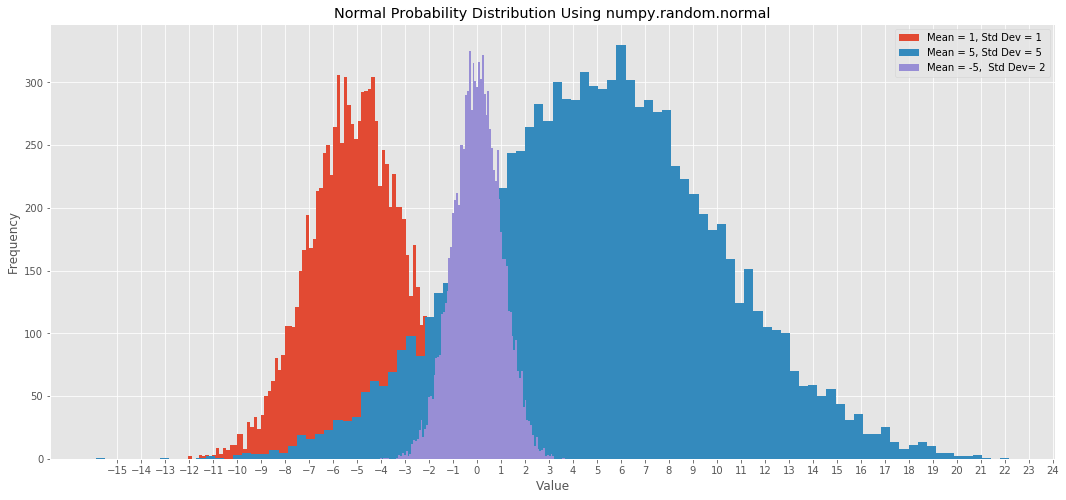

In [34]:
# SHowing the difference mean and standard deviation makes
# Mean of 0, std deviation of 1
h = np.random.normal(loc=0, scale = 1, size =10000)
# Mean of 5, std deviation of 5
m = np.random.normal(loc=5, scale = 5, size =10000)
# Mean of -5, std deviation of 2
l = np.random.normal(loc=-5, scale = 2, size =10000)

plt.hist(l, bins = 100, label = "Mean = 1, Std Dev = 1")
plt.hist(m, bins = 100, label = "Mean = 5, Std Dev = 5")
plt.hist(h, bins = 100, label = "Mean = -5,  Std Dev= 2")
plt.title('Normal Distribution')
# Needed to create a table
table = [[0, np.mean(h),1,np.std(h)], [5, np.mean(m),5,np.std(m)],[-5, np.mean(l),2,np.std(l)]] 

# Configuring Plot
plt.xticks(np.arange(-15, 25, 1))
plt.xlabel("Value")  
plt.ylabel("Frequency")  
plt.title("Normal Probability Distribution Using numpy.random.normal")
plt.legend(loc="upper right")

# Create Table showing the difference between calculated and actual values of means and std deviations
hdr = ["𝜇 (entered)", "𝜇 (Actual)", "𝜇(Expected)", "𝜎(Actual)"]
print(tabulate(table, headers = hdr,  tablefmt="grid"))

plt.show()

An example of using the normal distribution to fake up some data to represent an equation like this:
$$ y = 7x^2 + 5x - 3 \epsilon$$

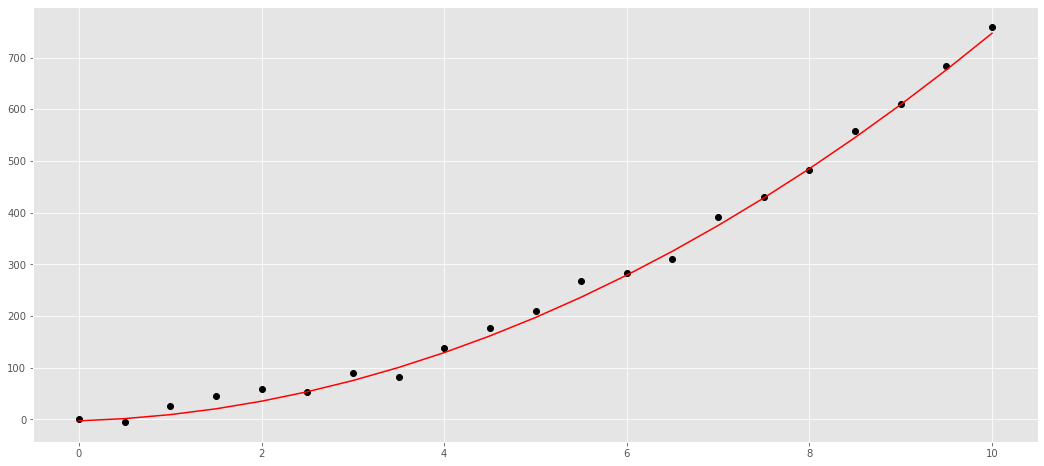

In [35]:
# Setting the x values
x = np.arange(0.0, 10.1, 0.5)
# Introducing a random error via the np.random.normal function
y = 7.0 * x * x +5 * x -3 + np.random.normal(10.0, 15.0, len(x))
# For comparison - adding a line to indicate what the line would be like without the error
z = 7.0 * x * x +5 * x -3

# PLot both lines
plt.plot(x,y,"ko")
plt.plot(x,z, "r-")

### <a name="uniform"></a>6.3 Uniform Distribution

When you roll a die, the outcomes are 1 to 6. The probabilities of getting these outcomes are equally likely which is the very definition of a uniform distribution. This means that for $n$ possible outcomes, any one outcome has a probability of $\frac{1}{n}$.  

So in the range from $a$ to $b$, $n$ becomes $b - a$. So any value has the probability $\frac{1}{b-a}$  

A variable X is said to be uniformly distributed if the density function is:  
$$ f(x) = \frac{1}{b-a}$ for $- \infty <a \leq x \leq b < \infty$$  

Uniform distributions may refer to either discrete or continuous data, once each value between the upper and lower limits is equally likely - the nature of the incoming data does not matter. An example of some uniform data could be the number of liters of milk sold in a shop every day, or indeed produced from the herd.  

The graph of a uniform distribution curve looks like a rectangle and is therefore sometimes called "rectangular distribution".  

The mean and standard deviation of X following a uniform distribution are given by the equations below, but are of less relevance to the uniform distributions than they are to other distributions. The upper and lower limits ($a$ and $b$ values) describe the uniform distribution better than the $\mu$ and $\sigma$ values:

$$\mu = \frac{a+b}{2}$$

$$\sigma = \frac{(b-a)}{\sqrt{12}}$$

The probability distribution function for this distribution is defined as:  
$$
f(x)=
\begin{cases}
{\frac{1}{b-a}}, \text{ for } a\leq x \leq b,\\
0, \text{ for } x< a \text{ or }x > b
\end{cases}
$$

**numpy.random.uniform**  
_Syntax_:  
numpy.random.uniform(low=0.0, high=1.0, size=None)  

_Description:_  
Samples are uniformly distributed over the half-open interval _i.e._ inclusive of the low limit, exclusive of the high limit. In other words, any value within the given interval is equally likely to be drawn by uniform.  

It takes three parameters, all of which are optional. The first two are the lower and upper limits of the distribution. As mentioned above, the lower limit is included in the distribution, while the upper limit is not. If no values are specified, it is assumed that the low is 0.0 and the high value is 1.0. if the high and low values are equal, every value returned will be of the low value. High values lower than the low value should not be entered and may result in erratic behaviour and ultimately errors. 

As with all other distributions, there is a parameter called size, which will specify the size and shape of the output being generated from this function. As with all other functions, if not specified, this will be a single returned value.  

_Returns:_  
Samples from the uniform distribution between the low and high values excluding the high value itself).

In [36]:
# No parameters entered
np.random.uniform()

0.16356258974777593

(array([ 977.,  976., 1004., 1011., 1009.,  985.,  996.,  976., 1018.,
        1048.]),
 array([1.00059663, 1.60052656, 2.20045649, 2.80038642, 3.40031635,
        4.00024628, 4.60017621, 5.20010614, 5.80003607, 6.39996599,
        6.99989592]),
 <a list of 10 Patch objects>)

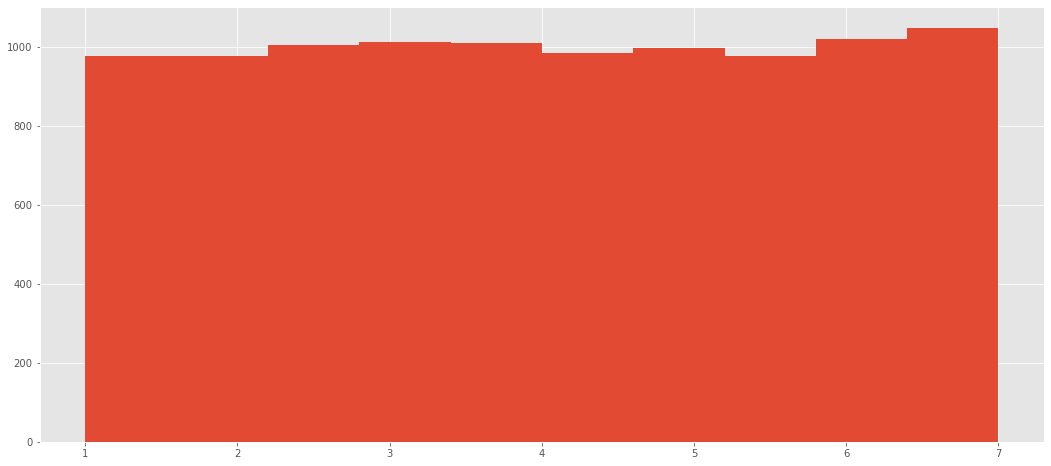

In [37]:
# Rolling a die 10000 times
x = np.random.uniform(1,7,10000)
plt.hist(x)

### <a name="chi"></a>6.4 Chi Squared Distribution  

The chi-squared distribution is continuous cumulative probability distribution. It is built on top of normal distributions and where the normal distribution is actually squared to produce the chi-squared distribution. Every normally distributed variable added to the chi-squared distribution is referred to as the degrees of freedom, so for example if there are three variables used, the chi squared distribution is said to have three degrees of freedom.  The degrees of freedom massively affect the shape of the distribution profile (see plots below).  

As all the input to this distribution are squared there are no negative values and tends to be right-skewed. The extent of its skewness depends on the degrees of freedom or number of observations. The higher the degrees of freedom (more observations), the less skewed (more symmetrical) the chi-squared distribution. The chi-squared distribution is important for its use in chi-squared tests. These are often used to test deviations between observed and expected frequencies, or to determine the independence between categorical variables. When conducting a chi-squared test, the probability values derived from chi-squared distributions can be looked up in a statistical table.  


The variable obtained by summing the squares of df independent, standard normally distributed random variables:

$$Q = \sum_{i=0}^{\mathtt{df}} X^2_i$$

is chi-square distributed, denoted

$$Q \sim \chi^2_k.$$

The probability density function of the chi-squared distribution is

$$p(x) = \frac{(1/2)^{k/2}}{\Gamma(k/2)}
x^{k/2 - 1} e^{-x/2},$$

where $\Gamma$ is the gamma function,

$$\Gamma(x) = \int_0^{-\infty} t^{x - 1} e^{-t} dt.$$

To show the distribution, over the different degrees of freedom, we will use scipy.stats chi2 module. This module has pdf functions which makes for easier plotting.

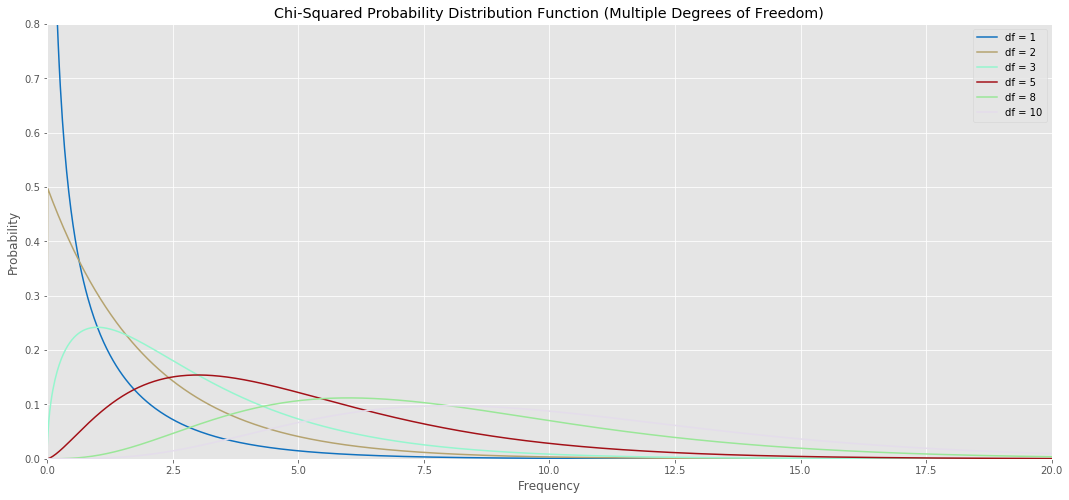

In [38]:
# Showing the shape of chisquare distribution
from scipy.stats import chi2

# Generating a dataset
x = np.linspace(-1, 20, 1000)

# Repeat for a number of degrees of freedom
for df in [1,2,3,5,8,10]:
    
    # Create the distribution (using scipy.stats)
    dist = chi2(df, 0) # chi2 takes degrees of freedom and mean parameters. Here we set mean to 0.
    
    # Plot the Probability Distribution
    plt.plot(x, dist.pdf(x), 
             color = np.random.rand(3),
             label = "df = " + str(df))

# Configuring Plot
plt.xlim(0, 20)
plt.ylim(0, 0.8)
plt.xlabel("Frequency")  
plt.ylabel("Probability")  
plt.title("Chi-Squared Probability Distribution Function (Multiple Degrees of Freedom)")
plt.legend(loc="upper right")
plt.show()

**numpy.random.chisquare**  
_Syntax:_  
numpy.random.chisquare(df, size=None)  

_Description:_  
Draws samples from a chi-square distribution. This function take two parameters - df which is the degrees of freedom of the distribution. This is a floating point number and should always be positive. Like every other distribution, there is also an optional parameter for the size. The size defines the shape and size of the output form this function.  

_Returns:_  	
Drawn samples from the parameterized chi-square distribution.

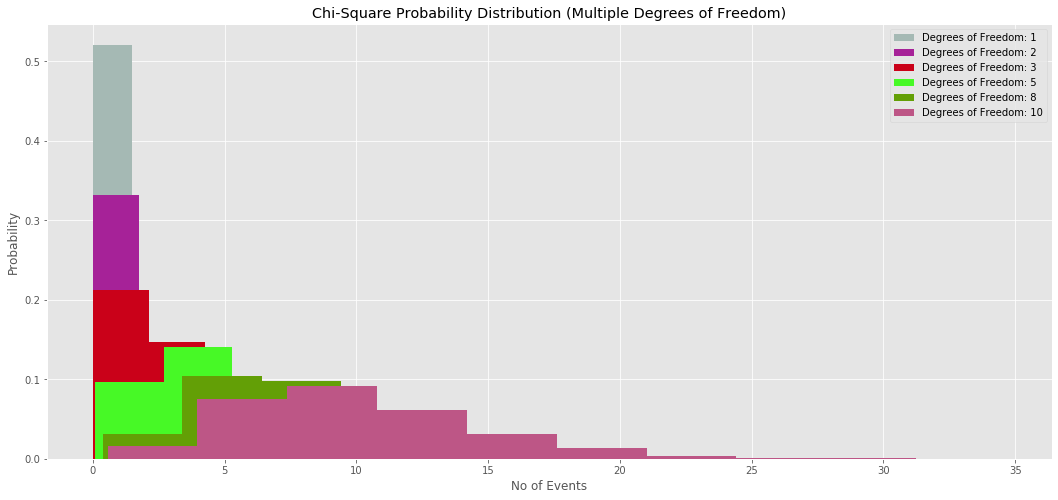

In [39]:
#plt.hist(np.ranbdom.chisquare(1,1000))

size = 10000
#Going to check against a range of degrees of freedom values from 1-10
for df in [1,2,3,5,8,10]:
   
    # generate size values from a poisson distribution
    cs_values = np.random.chisquare(df, size)
    
    # draw histogram of chisquare values
    plt.hist(
        cs_values,
        density=1,
        # pick a random color - using np.random.rand!
        color = np.random.rand(1, 3),
        # label the histogram with its probability
        label="Degrees of Freedom: "+str(df))
# Configuring Plot
#plt.xticks(np.arange(0, 1100, 100))
plt.xlabel("No of Events")  
plt.ylabel("Probability")  
plt.title("Chi-Square Probability Distribution (Multiple Degrees of Freedom)")
plt.legend(loc="upper right")

plt.show()

In [40]:
# Here we are just showing the data produced. As you would expect with a df of 1, most values are around 0
x = np.random.chisquare(1, 100)

#Print some basic stats on results
print("Min x:", np.min(x),"; Max x :", np.max(x),"; Mean x:", np.mean(x))
print("Std Dev x:", np.std(x),"; Median x:", np.median(x))
print("-------------------------------------------")

# And the returned data itself
print(x)

Min x: 9.510864090485097e-05 ; Max x : 13.642608963774435 ; Mean x: 1.1601916049041519
Std Dev x: 1.8286463000429956 ; Median x: 0.37910785336943476
-------------------------------------------
[4.42154506e-02 2.21388611e+00 2.08537511e+00 3.61249656e-01
 5.62581256e-02 7.03081626e-01 1.33982320e-01 4.43733254e+00
 2.39415461e-02 4.47719780e-02 5.88458073e+00 1.11806926e-01
 2.23681269e-01 1.14866021e-02 1.33167902e+00 2.36098253e-01
 1.93304804e+00 5.26590255e-01 1.00025515e-01 1.27265018e-02
 1.87263177e-01 3.04534107e+00 9.92700144e-02 2.27101565e-01
 5.32566921e-03 2.01506915e+00 7.77540623e-01 2.60369970e-01
 2.94468146e-01 1.52950440e+00 9.51086409e-05 1.65515311e-04
 3.70769844e+00 3.96258835e-02 1.68424959e-01 4.88958019e+00
 3.20832824e-01 3.28022882e+00 2.35011884e+00 3.11100176e-01
 7.44462351e-01 1.69335546e-01 2.31384185e-01 1.39558038e+00
 2.55121026e-02 1.03417329e+00 1.36426090e+01 1.70961219e-02
 2.89830325e+00 2.75439053e+00 1.01474039e+00 9.07418544e-01
 2.24543785e+0

### <a name="poisson"></a>6.5 Poisson Distribution  ###

The Poisson distribution is used to describe discrete data such as counts in which the population size is large, the probability of each individual event is small, but the expected number of events is moderate (say five or more). Typical examples include:
* the number of deaths in a city from a particular disease per day
* the number of admissions to a particular hospital
* the number of car crash accidents for insurance prediction
* the number of extreme weather events
* the number of calls in a call centre
* the number of IT service requests within a company.

A distribution is called Poisson distribution when the following assumptions are valid:

1. Any successful event should not influence the outcome of another successful event.
2. The probability of success over a short interval must equal the probability of success over a longer interval.
3. The probability of success in an interval approaches zero as the interval becomes smaller.
4. A successful event can take place any number of times (within the defined time period).  
5. Two events cannot take place at the same time.  


Given $\lambda$ is the rate at which an event occurs,
t is the length of a time interval,
And X is the number of events in that time interval.
Here, X is called a Poisson Random Variable and the probability distribution of X is called Poisson distribution.

Let $\mu$ denote the mean number of events in an interval of length t. Then, $\mu = \lambda*t$.

For events with an expected separation $\lambda$ the Poisson distribution $f(k; \lambda)$ describes the probability of k events occurring within the observed interval $\lambda$. The probability mass function is given by the equation:  

$$f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$$


**numpy.random.poisson**  
_Syntax:_  
numpy.random.poisson(lam=1.0, size=None)

_Description:_  
Draw samples from a Poisson distribution and takes 2 optional parameters.  lam is equivalent to the $\lambda$ in the above equation and refers to the expected interval between events. If no value is given, numpy assumes the value of &\lambda$ is 1.0. 

As with other distributions the size parameter is the output size and shape. A single value is returned if no value is entered for the size.  

It should be noted that as numpy is created in the C programming language and it is tied to the limitations of the datatype sizes. As a result a ValueError is raised when the inputted $\lambda$ value is within 10 $\sigma$ of the maximum preresentable value of the long datatype which is 2,147,483,647.

In [41]:
# Native - no parameters
np.random.poisson(3,20)

array([7, 4, 2, 3, 0, 2, 6, 1, 4, 1, 3, 3, 5, 3, 2, 2, 1, 3, 4, 0])

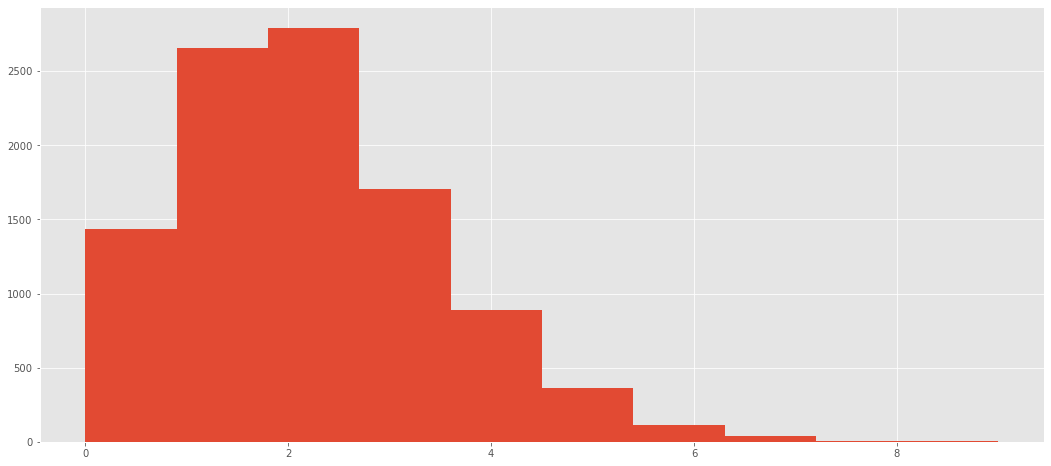

In [42]:
# Specifying an interval of 2 and 
lam = 2
size = 10000
poisson = np.random.poisson(lam, size)
plt.hist(poisson, label = "Poisson Distribution")
plt.show()

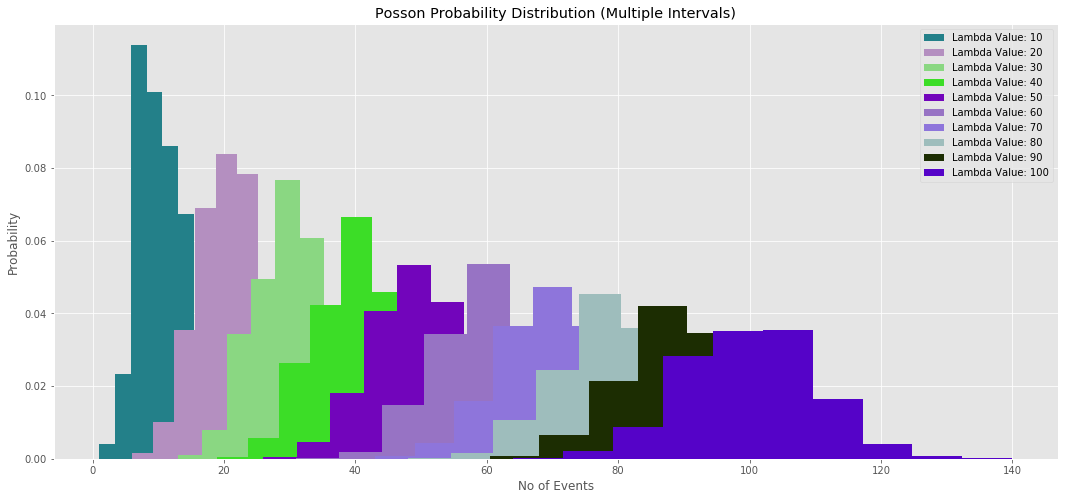

In [43]:
size = 10000
#Going to check against a range of lambda values from 10 - 100
for lam in range(10, 110, 10):
   
    # generate size values from a poisson distributiondeg
    ps_values = np.random.poisson(lam, size)
    
    # draw histogram of poisson values
    plt.hist(
        ps_values,
        density=1,
        # pick a random color - using np.random.rand!
        color = np.random.rand(1, 3),
        # label the histogram with its probability
        label="Lambda Value: "+str(lam))

# Configuring Plot
plt.xlabel("No of Events")  
plt.ylabel("Probability")  
plt.title("Posson Probability Distribution (Multiple Intervals)")
plt.legend(loc="upper right")

plt.show()

### <a name="summary"></a>6.6 Distribution Comparison Summary ###

To summarise the various distributions discussed in this report see the table below:

| Distribution | Inputs | Used |
|--------------|------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Binomial | No of repeats, probability of success for each, no of trials for each. | For discrete data, checking for probability of "success". |
| Normal | Mean, standard deviation and size | Where most of the values are expected in a small band with fewer values the further from the mean you go. Simulation of most real world data. |
| Uniform | Upper and Lower limits of range and size | Where every possible value is equally probable. |
| Chi-Squared | Degrees of freedom, size | To perform a “goodness-of-fit” test or to determine whether two random variables are independent. |
| Poisson | Interval and size | Where events occur at random times and we are concerned with only the number of occurrences of the event. The population is large, the probability of individual events are small, but the expected number of events is moderate. |

**<center>Table 5 - Distribution Comparison Summary</center>**

## <a name="seeds"></a>7. Seeds in Pseudorandom Number Generation##

While the name suggests that the output of numpy.random is random, it is however only pseudorandom in nature, meaning that data / functions generated from this library element has all the appearance of randomness, but in fact is generated in a specific deterministic manner. This is done via a pseudorandom number generator (PRNG) and for all intents and purposes is fully sufficient for all our data analytics (and many other) needs.  

PRNGs are typically algorithms that use mathematical formulae or simply precalculated tables to produce sequences of numbers that appear random. An example of some pseudorandom numbers would be the decimal places in $\pi$. $\pi$ is what is called an infinite decimal number in that its decimal places will go on without end without repetition. The value of $\pi$ has been calculated to 22 trillion decimal places by some computers. We could to take a specific start point in the decimal places, _e.g._ the 100th decimal place and then every time a random number was requested we used the next decimal place. The resultant number would appear random but if you knew the PRNG mechanism and start point you could easily tell the next number in the sequence.  

Algorithms are more commonly used as PRNGs. Up until the latest version, NumPy the algorithm used is commonly used PRNG, the Mersenne Twister algorithm. This algorithm goes to $2^{19937}-1$ values before it repeats itself thus making memorising the sequence of numbers problematic at best even if you knew which algorithm was being employed! The latest version of NumPy uses the Parallel Congruent Generator PCG64 instead.  

Sometimes when we are doing a simulation or some testing we want "random" numbers, but we want to run these same random numbers repeatedly for example in different scenarios, when we make changes to the code etc. With TRNG this would not be possible but with PRNGs we just need to know the starting point from which the random numbers were generated. In the case of th $\pi$ example, which decimal place it started with. In the case of the Mersenne Twister, which value was first inputted into the algorithm. This first value on which all subsequent random numbers are generated is known as the seed. With the NumPy random module we have the ability to set this seed via random.seed function.  


**numpy.random.seed**  
_Syntax:_
numpy.random.seed(seed=None)

_Description:_  
Provides the starting point for the PRNG. It is automatically called during initialisation and thereafter it may be called manually with the seed set. It takes one single but optional parameter - the seed. If none is selected, numpy puts in a random value - thereby negating the repeatable effects of the function. This is useful only when auto-called on initiation.

_Returns:_  
np.random.seed does not in itself return any value. It re-seeds the PRNG giving it a start point for random number generation.


In [44]:
# Examining use of seed
n = 10 # Used as number of repeats

# First off shuffle numbers randomly without setting the seed
print("Randomly shuffled numbers")

# Repeat this n times to show we get a different result every time
for i in range(n):
    # Creating an array of length n from 0 to n-1
    arr = np.arange(n)  # [0, 1, 2, ... n-1]
    # Here we randomly shuffle the array
    np.random.shuffle(arr)  # Shuffle!
    # Print the array to show it is shuffled randomly
    print(arr)

# Now repeat the above, but this time setting the seed
print("Randomly shuffled numbers with setting the seed")
for i in range(n):
    arr = np.arange(n)  # [0, 1, 2, ... n-1]
    np.random.seed(1)  # Set the seed to a known value. 
    np.random.shuffle(arr)  # Shuffle!
    # Print the array to show how it has shuffled 
    print(arr)

# This time we will change the seed. 
for i in range(n):
    arr = np.arange(n)  # [0, 1, 2, ... n-1]
    np.random.seed(i)  # Set the seed to varying numbers
    np.random.shuffle(arr)  # Shuffle!
    # Print the resultant array
    print("Randomly shuffled numbers with setting the seed at", i, arr)

Randomly shuffled numbers
[9 2 1 8 0 6 3 5 7 4]
[0 8 5 7 1 3 4 2 9 6]
[7 2 0 3 8 1 4 5 9 6]
[1 8 4 9 0 6 2 5 3 7]
[0 4 1 8 9 6 7 3 5 2]
[9 1 7 5 6 0 8 3 2 4]
[8 0 5 6 7 4 3 9 1 2]
[0 2 7 1 4 6 9 3 8 5]
[8 5 7 6 3 0 1 4 2 9]
[5 9 3 0 8 1 2 7 4 6]
Randomly shuffled numbers with setting the seed
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
Randomly shuffled numbers with setting the seed at 0 [2 8 4 9 1 6 7 3 0 5]
Randomly shuffled numbers with setting the seed at 1 [2 9 6 4 0 3 1 7 8 5]
Randomly shuffled numbers with setting the seed at 2 [4 1 5 0 7 2 3 6 9 8]
Randomly shuffled numbers with setting the seed at 3 [5 4 1 2 9 6 7 0 3 8]
Randomly shuffled numbers with setting the seed at 4 [3 8 4 9 2 6 0 1 5 7]
Randomly shuffled numbers with setting the seed at 5 [9 5 2 4 7 1 0 8 6 3]
Randomly shuffled numbers with setti

As can be seen above, when you set the seed you get reproducible "random" numbers, but by moving the seed on a digit, a whole new set of numbers are generated.  

So let's return to our simple guessing game we played at the start and see if we can guess correctly ...  

***
**Simple Guessing Game Part 2**

# ------------------ Hint - Guess 5! ------------------- #

In [46]:
# Simple Guessing Game
# Generate a random integer between 1 and 10
np.random.seed(272389) # The seed can be any integer
compChoice = np.random.randint(1,11)
# Ask the player to pick a number
yourChoice = int(input("Pick a number between 1 and 10: "))

Pick a number between 1 and 10: 5


In [47]:
# Compare the 
if compChoice == yourChoice:
    # If the player guessed right, tell them
    print(colored("Congrats - you guessed", "blue"), colored(yourChoice,'green'), colored("and I picked", "blue"), colored(compChoice, "green"))
else:
    # If the player guessed incorrectly, tell them too
    print(colored("Hard luck. You guessed","blue"), colored(yourChoice, "red"), colored("and I picked", "blue"), colored(compChoice, "green"))

Congrats - you guessed 5 and I picked 5


Now let's ramp this up and see how good you really are:  

***
**Simple Guessing Game Part 3**

# ------------------ Hint - Guess 253457! ------------------- #

In [48]:
# Simple Guessing Game
# Generate a random integer between 1 and 1,000,000
np.random.seed(4331) # The seed can be any integer
compChoice = np.random.randint(1,1000001)
# Ask the player to pick a number
yourChoice = int(input("Pick a number between 1 and 1,000,000: "))

Pick a number between 1 and 1,000,000: 253457


In [49]:
# Compare the 
if compChoice == yourChoice:
    # If the player guessed right, tell them
    print(colored("Congrats - you guessed", "blue"), colored(yourChoice,'green'), colored("and I picked", "blue"), colored(compChoice, "green"))
else:
    # If the player guessed incorrectly, tell them too
    print(colored("Hard luck. You guessed","blue"), colored(yourChoice, "red"), colored("and I picked", "blue"), colored(compChoice, "green"))

Congrats - you guessed 253457 and I picked 253457


Now that is amazing! With luck like that you should consider going to Vegas ... but only if you know the algorithm and the seed!  

(TRNGs are used for gambling purposes. They are not repeatable unfortunately.)

***

## <a name="refs"></a>8. References ##
1. [NumPy Site](http://www.numpy.org/)
2. [Project Jupyter](http://jupyter.org/)  
3. [NumPy Wikipedia Page](https://en.wikipedia.org/wiki/NumPy)  
4. Python for Data Analysis Book  
5. [Numpy Random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)  
6. [Generating Random Data in Python (Guide)](https://realpython.com/python-random/)  
7. [Stack Overflow: Difference between various numpy random functions](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)  
8. [A Quick Introduction to the NumPy Random Choice Function](https://www.sharpsightlabs.com/blog/numpy-random-choice/)  
9. https://www.reddit.com/r/Python/comments/jn0bb/randomrandint_vs_randomrandom_why_is_one_15x/  
10. http://onlinestatbook.com/2/probability/binomial.html  
11. https://www.mathsisfun.com/data/binomial-distribution.html  
12. [Standard Statistical Distributions (e.g. Normal, Poisson, Binomial) and their uses](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/statistical-distributions)  
13. [6 Common Probability Distributions every data science professional should know](https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/)  
14. [Random.org: Introduction to Randomness and Random Numbers](https://www.random.org/randomness/)  
15. [StatTrek: Binomial Probability Distribution](https://stattrek.com/probability-distributions/binomial.aspx)  
16. [Statistical Bias Lecture](https://web.microsoftstream.com/video/fbf7508f-99a2-4054-bc54-1cdca68450e8)  
17. [Live Science: What is Pi?](https://www.livescience.com/29197-what-is-pi.html)  
18. [Tutorials Point: Python Chi Squared Test](https://www.tutorialspoint.com/python_data_science/python_chi_square_test.htm)